In [1]:
library(readxl)
employees <- read_excel("2010_White_House_Staff.xlsx") # nolint

In [2]:
str(employees)

tibble [469 × 5] (S3: tbl_df/tbl/data.frame)
 $ Employee Name  : chr [1:469] "Abrams, Adam W." "Adams, Ian H." "Agnew, David P." "Albino, James" ...
 $ Employee Status: chr [1:469] "Employee" "Employee" "Employee" "Employee" ...
 $ Salary         : num [1:469] 66300 45000 93840 91800 130500 ...
 $ Pay Basis      : chr [1:469] "Per Annum" "Per Annum" "Per Annum" "Per Annum" ...
 $ Position Title : chr [1:469] "WESTERN REGIONAL COMMUNICATIONS DIRECTOR" "EXECUTIVE ASSISTANT TO THE DIRECTOR OF SCHEDULING AND ADVANCE" "DEPUTY DIRECTOR OF INTERGOVERNMENTAL AFFAIRS" "SENIOR PROGRAM MANAGER" ...


In [3]:
summary(employees)

 Employee Name      Employee Status        Salary        Pay Basis        
 Length:469         Length:469         Min.   :     0   Length:469        
 Class :character   Class :character   1st Qu.: 45900   Class :character  
 Mode  :character   Mode  :character   Median : 66300   Mode  :character  
                                       Mean   : 82721                     
                                       3rd Qu.:113000                     
                                       Max.   :179700                     
 Position Title    
 Length:469        
 Class :character  
 Mode  :character  
                   
                   
                   

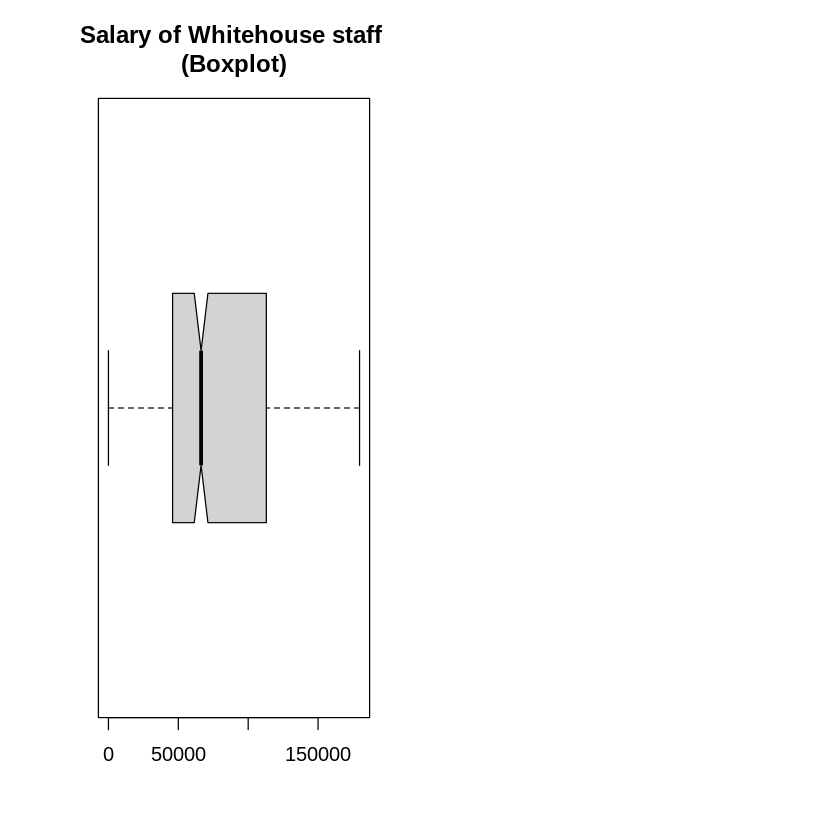

In [4]:
par(mfrow = c(1, 2))    # set the plotting area into a 1*2 array
boxplot(employees$Salary, horizontal = TRUE, notch = TRUE, main = "Salary of Whitehouse staff \n(Boxplot)") # nolint

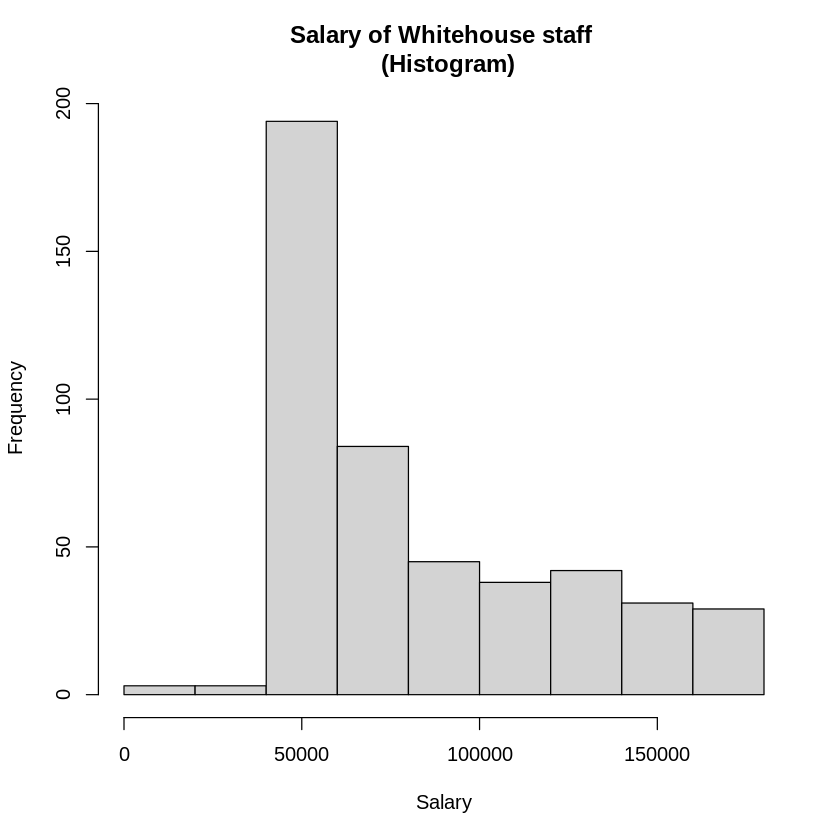

In [6]:
set.seed(1)
hist(employees$Salary, main = "Salary of Whitehouse staff \n (Histogram)", xlab = "Salary")

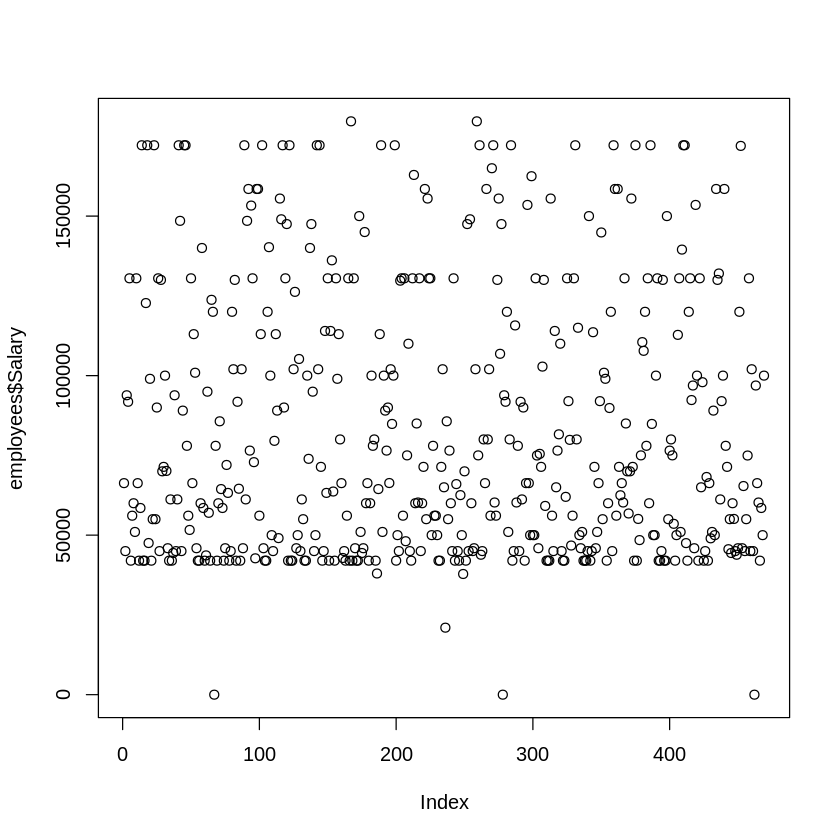

In [7]:
plot(employees$Salary)

In [8]:
sd <- sd(employees$Salary)
m <- mean(employees$Salary)
md <- median(employees$Salary)
q <- quantile(employees$Salary)
iq <- IQR(employees$Salary)
salary_without_zero <- as.numeric(unlist(strsplit(gsub("0\\,|(0\\,){2}.*","",paste0(employees$Salary,collapse=",")),","))) # nolint
gm <- prod(salary_without_zero)^(1 / length(salary_without_zero))
hm <- (1 / mean(1 / employees$Salary))
# Generate frequency table
f_table <- table(employees$Salary)
# Mode of salary
mode_salary <- names(f_table)[which(f_table == max(f_table))]
# Variance v
v <- var(employees$Salary)
# Mean deviation
m_deviation <- sum(abs(employees$Salary - m)) / length(employees$Salary)

sd_message <- "Standard Deviation of salaries: "
mean_message <- "Mean of salaries: "
median_message <- "Median of salaries: "
quartile_message <- "Quartile of salaries: "
iq_message <- "Inter quartile range of salaries: "
gm_message <- "Geometric Mean of salaries: "
hm_message <- "Harmonic Mean of salaries: "
mode_message <- "Mode of salaries: "
v_message <- "Variance of salaries: "
range_message <- "Range of salaries: "
md_message <- "Mean Deviation of salaries: "

In [9]:
print(paste(sd_message, sd))
print(paste(mean_message, m))
print(paste(md_message, m_deviation))
print(paste(median_message, md))
print(quartile_message)
print(q)
print(paste(iq_message, iq))
print(paste(gm_message, gm))
print(paste(hm_message, hm))
print(paste(mode_message, mode_salary))
print(paste(v_message, v))
print(paste(range_message, max(employees$Salary) - min(employees$Salary)))

[1] "Standard Deviation of salaries:  41589.433381281"
[1] "Mean of salaries:  82721.3368869936"
[1] "Mean Deviation of salaries:  35371.5480289688"
[1] "Median of salaries:  66300"
[1] "Quartile of salaries: "
    0%    25%    50%    75%   100% 
     0  45900  66300 113000 179700 
[1] "Inter quartile range of salaries:  67100"
[1] "Geometric Mean of salaries:  5.98753046881818e+20"
[1] "Harmonic Mean of salaries:  0"
[1] "Mode of salaries:  42000"
[1] "Variance of salaries:  1729680968.97601"
[1] "Range of salaries:  179700"


In [12]:
install.packages("ggpubr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘Rcpp’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’




In [13]:
library(tidyverse)
library(ggpubr)
library(rstatix)
set.seed(123)
employees_group <- employees %>% group_by(employees$`Position Title`)


Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter




In [15]:
get_summary_stats(employees_group, type = "mean_sd")

employees$`Position Title`,variable,n,mean,sd
<chr>,<fct>,<dbl>,<dbl>,<dbl>
ADVANCE COORDINATOR,Salary,1,42000.00,NA
ADVISOR,Salary,2,65000.00,91923.882
ANALYST,Salary,11,44126.64,7053.255
ASSISTANT COUNSEL FOR NOMINATIONS,Salary,1,50000.00,NA
ASSISTANT DIRECTOR,Salary,7,52471.43,6109.205
ASSISTANT EXECUTIVE CLERK,Salary,2,102387.50,6295.372
ASSISTANT PRESS SECRETARY,Salary,5,78000.00,0.000
ASSISTANT SHIFT LEADER,Salary,6,57254.83,5304.250
ASSISTANT SPEECHWRITER,Salary,1,42000.00,NA


In [16]:
asst_salary <- employees %>%
  filter(employees$`Position Title` == "SPECIAL ASSISTANT TO THE PRESIDENT FOR LEGISLATIVE AFFAIRS") %>%
  pull(Salary)
staff_asst_salary <- employees %>%
  filter(employees$`Position Title` == "STAFF ASSISTANT") %>%
  pull(Salary)
# Compute t-test
res <- t.test(asst_salary, staff_asst_salary)
res



	Welch Two Sample t-test

data:  asst_salary and staff_asst_salary
t = 101.84, df = 23, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 87525.33 91154.67
sample estimates:
mean of x mean of y 
   130500     41160 


In [18]:
clock_speeds <- c(2.5, 1.7, 2.9, 2.7, 1.4, 1.9, 1.3, 1.9, 2.8, 2.2, 2.4, 1.7, 1.8, 2.2, 2.2, 1.9, 2.7, 3.3, 1.9, 2.1) 
mean_clock_speed <- mean(clock_speeds) 

sd_clock_speed <- sd(clock_speeds) 

n <- length(clock_speeds)  

# Print the results 

print(mean_clock_speed) 

print(sd_clock_speed) 

print(n) 

[1] 2.175
[1] 0.5210061
[1] 20


In [20]:
#Find the pvalue from the gotten solution in number 11. 
#t = 0.64378
#df = 19
#find both LEFT and RIGHT TAILS
pvalLeft <- pt(q= -0.64378, df=19,lower.tail = TRUE)
pvalLeft
pvalRight <- pt(q= 0.64378, df=19,lower.tail = FALSE)
pvalRight

[1] 0.2637067

[1] 0.2637067